<h1><center><b>Cisco Incubator 2022: DevNet Track</b></center></h1>

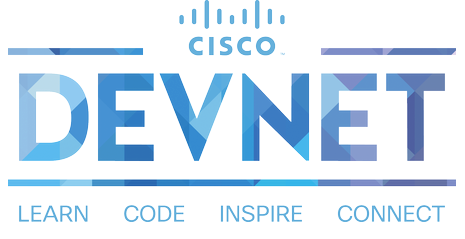

----------------------------------------------------------------------------

<h1><center><b>Session 1: Software Design and Development with Python </b></center></h1>

----------------------------------------------------------------------------

## Lab Instructions

Jupyter instructions contain two types of cells: Markdown and Code.
* **Markdown** - this is static content, like text and pictures. You **can't** interact with it.
* **Code** - this is an interactive cell which **can** be interacted with (run).<br> It is marked with 'In[ ]:' marker on a left.<br>To 'run' code cell press 'Shift+Enter' while the cell is selected (green border) or press 'Run' button in the menu bar (One code cell can be run many times)

This is a markdown cell!
It is static, you cant interact with it.

In [2]:
# This is code cell! You can interact with it by pressing 'Shift+Enter' or 'Run' button in the menu bar.
# Try it!
print("Hello World")

Hello World


If the **Code** cell has **In[ \* ]** on a left, it means that it's during the execution of the code. Always wait when the number appears here, for example **In[ 1 ]** - it will mean that the code has been executed.

<font style="color:red;"><center>**DISCLAIMER: You need to execute Code cells one by one! Otherwise, it won't work!**<center><font>

----------------------------------------------------------------------------

<center>
    <b>Plan:</b><br>
1. Python Recap<br>
2. Clean Code<br>
3. Software Design (MVC and Observer)<br>
4. Code Review Process<br>
5. Testing<br>
6. TDD Concept<br>
</center>

----------------------------------------------------------------------------

<h2><b>1. Python Recap</b></h2>

<h3><b>Functions and Methods</b></h3>

Methods and functions - blocks of code that perform tasks when executed. If the method or function is not executed, those tasks will not be performed. 

When to put code inside a method or function?
+ Task code that is used *more than once* should probably be encapsulated - if you find yourself copying several lines of code around, you need a method or function
+ Code that performs a *discrete task* - even if it happens only once, e.g. functions that evaluate inputs and return a logical result (for example, compare two strings for length), perform I/O operations (for example, read a file from disk), or translate data into other forms (for example, parse and process data). In these case, you encapsulate for clarity and testability, as well as for possible future re-use or extension.

In [1]:
# [1A] Function definition: no params, nothing returned
def functionName():
  print('Do Something')
# Call the function
functionName()

Do Something


<b>Arguments and Parameters</b>

Execute the code based on the values of variables passed in on execution = arguments. In order to use arguments when calling a method or function, the method or function needs to be written to accept these variables as parameters.

Parameters can be any data type and each parameter in a method or function can have a different data type. Arguments passed to the method or function must match the data type(s) expected by the method or function.

Parameters and arguments add flexibility to methods and functions. Sometimes the parameter is just a boolean flag that determines whether certain lines of code should be executed in the method or function. Think of parameters as being the input to the method or function.

Syntax of a function using arguments and parameters in Python:

In [3]:
# [1B] Function definition: input params, nothing returned
def rectangle_area(a,b):
  area = a*b
  print(area)
    
# Call the function
rectangle_area(4,3)

12


**'Strongly typed' languages** - some languages require the data type to be defined in the parameter, while some permit this optionally but it is usually a good idea (code easier to reuse - you see what kind of parameters a method or function expects, error messages are clearer - type missmatch easy to fix):

In [42]:
# [1C] Function definition: input params with types, nothing returned
def rectangle_area(a: int,b: int) -> int:
  area = a*b
  print(area)
  return area
    
# Call the function
area = rectangle_area(4,3);
area

12


12

<b>Return Statements</b>

Methods and functions can also return a value (return statement)

When a return statement is executed, the value of the return statement is returned and any code below it gets skipped. It is the job of the line of code calling the method or function to grab the value of the return, but it is not mandatory.

In [5]:
# [1D] Function definition: params, result returned
def rectangle_area(a,b):
  area = a*b
  return area
  print(area) #that won't be executed
    
# Call the function
rectangle1 = rectangle_area(4,3)
rectangle2 = rectangle_area(5,6)
full_area = rectangle1 + rectangle2
print(full_area)

42


Notice that the version of code that uses functions, parameters, and arguments results in **no duplicate code**. Also, by using functions, you are able to label blocks of code, which make their purposes more understandable. If this example were more complicated and there were a lot of lines of code within each function, having the blocks of code duplicated three times in the file would make it much harder to understand.

<h3><b>Modules</b></h3>

Modules are a way to build independent and self-contained chunks of code that can be reused, packaged as a single file, work independently. Developers typically use modules to divide a large project into smaller parts. This way the code is easier to read and understand, and each module can be developed in parallel without conflicts. 

A module consists of a set of functions and typically contains an interface for other modules to integrate with. It is essentially, a library, and cannot be instantiated.

In [6]:
import math

print(math.pi)

3.141592653589793


<h3><b>Classes</b></h3>

In most object-orient programming (OOP) languages, and in Python, classes are a means of bundling data and functionality (via methods) in a single structure. Each class declaration defines a new object type.

Classes may have class variables and object variables. As a new class object is created, new class data members and object data members (variables) are created. New classes may be defined, based on existing, previously defined classes, so that they inherit the properties, data members, and functionality (methods).

In [7]:
# Class definition
class Car():
    def __init__(self, brand, model):
        self.brand = brand
        self.model = model
        self.air_conditioning = True  #shared by all objects by default

As with other Python data structures and variables, objects are instantiated (created) as they are first used, rather than being predeclared.  
A class may be instantiated (created) multiple times, and each with its own object-specific data attribute values. 

Python classes also support class variables that are shared by all objects of a class.  
Outside of the class name scope, class methods and data attributes are referenced using the dot notation: [class instance].[method name].

In [8]:
# 1st instance (Object) created based on Class definition
car1 = Car('Fiat', 'Punto')
print(car1)
print(car1.brand)
print(car1.model)
print(car1.air_conditioning)

# 2nd instance (Object) created based on Class definition
car2 = Car('Porsche', 'Carrera')
print(car2)
print(car2.brand)
print(car2.model)
print(car2.air_conditioning)

Fiat
Punto
True
Porsche
Carrera
True


Note: Unlike other OOP languages, in Python, there is no means of creating 'private' class variables or internal methods. However, by convention, methods and variables with a single preceding underscore ( _ ) are considered private and not to be used or referenced outside of the class.

----------------------------------------------------------------------------

<h2><b>2. Clean Code</b></h2>

Clean code = developers trying to make their code easy to read and understand for other developers.

Golden rules:
- stick with indentation level (ALL tabs/spaces in the right places)
- standardized formatting e.g. syntax, curly braces ({}) - easier to scan and check using automated tools such as linters, or command-line tools like grep, awk, and sed.
- intuitive naming of variables, objects, and others
- code organization following standards
- documentation and comments
- removed all unused code
- modularity - facilitate testing and reuse
- should look nice

PEP8 = https://www.python.org/dev/peps/pep-0008/

In theory, other developers should be able to understand, use, and modify your code without being able to ask you questions. This accelerates development enormously, enabling reuse, debugging, security analysis, code review and merging, along with other processes. It lets longstanding projects (for example, open source projects) incorporate your code with greater confidence. And it lets organizations keep using your code efficiently, after you have moved on to other projects or jobs. It tends to result in code that works correctly (fewer bugs) and performs as required

By contrast, code that is not clean quickly becomes technical debt. It may be unmaintainable, or unusable with complete confidence. It is code that needs to be refactored, or removed and rewritten, which is expensive and time-consuming.

Following code could be easily broken into functions:

In [11]:
a = 2
b = 3
rect1 = a*b
print("Rectangle area: {0}".format(rect1))
c = 4
d = 5
rect2 = c*d
print("Rectangle area: {0}".format(rect2))
e = 6
f = 7
rect3 = e*f
print("Rectangle area: {0}".format(rect3))

Rectangle area: 6
Rectangle area: 20
Rectangle area: 42


In [12]:
def rectangle_area(a,b):
  area = a*b
  print("Rectangle area: {0}".format(area))
  return area

rect1 = rectangle_area(2,3)
rect2 = rectangle_area(4,5)
rect3 = rectangle_area(6,7)

Rectangle area: 6
Rectangle area: 20
Rectangle area: 42


Always think how to most efficiently break code into methods and functions, modules, and classes.

----------------------------------------------------------------------------

<h2><b>3. Code Review Process</b></h2>

**Code review** - when developers (reviewers) look over the codebase, a subset of code, or specific code changes (completed and tested!) and provide feedback. 

Reviewers:
- more than one reviewer when possible
- should understand the purpose of the code so that they can give quality and relevant feedback 
- providing comments, typically to the author of the code, on what they think needs to be fixed

Authors:
- it is up to the author to decide if the comment needs to be addressed (comments can be subjective),
- good to have agreement from the reviewer(s) if it will not be fixed

The goal of code reviews:
- code authors get input from the reviewers and learn additional best practices, other ways the code could have been implemented, and different coding styles (from their mistakes!)
- transfer knowledge about the code between developers (better understanding for the future)
- increases the quality of the final code (clean, refined, formatted, commented, free of bugs, following best practices, easy to read and understand)

**Code reviews aren’t just for junior developers!**

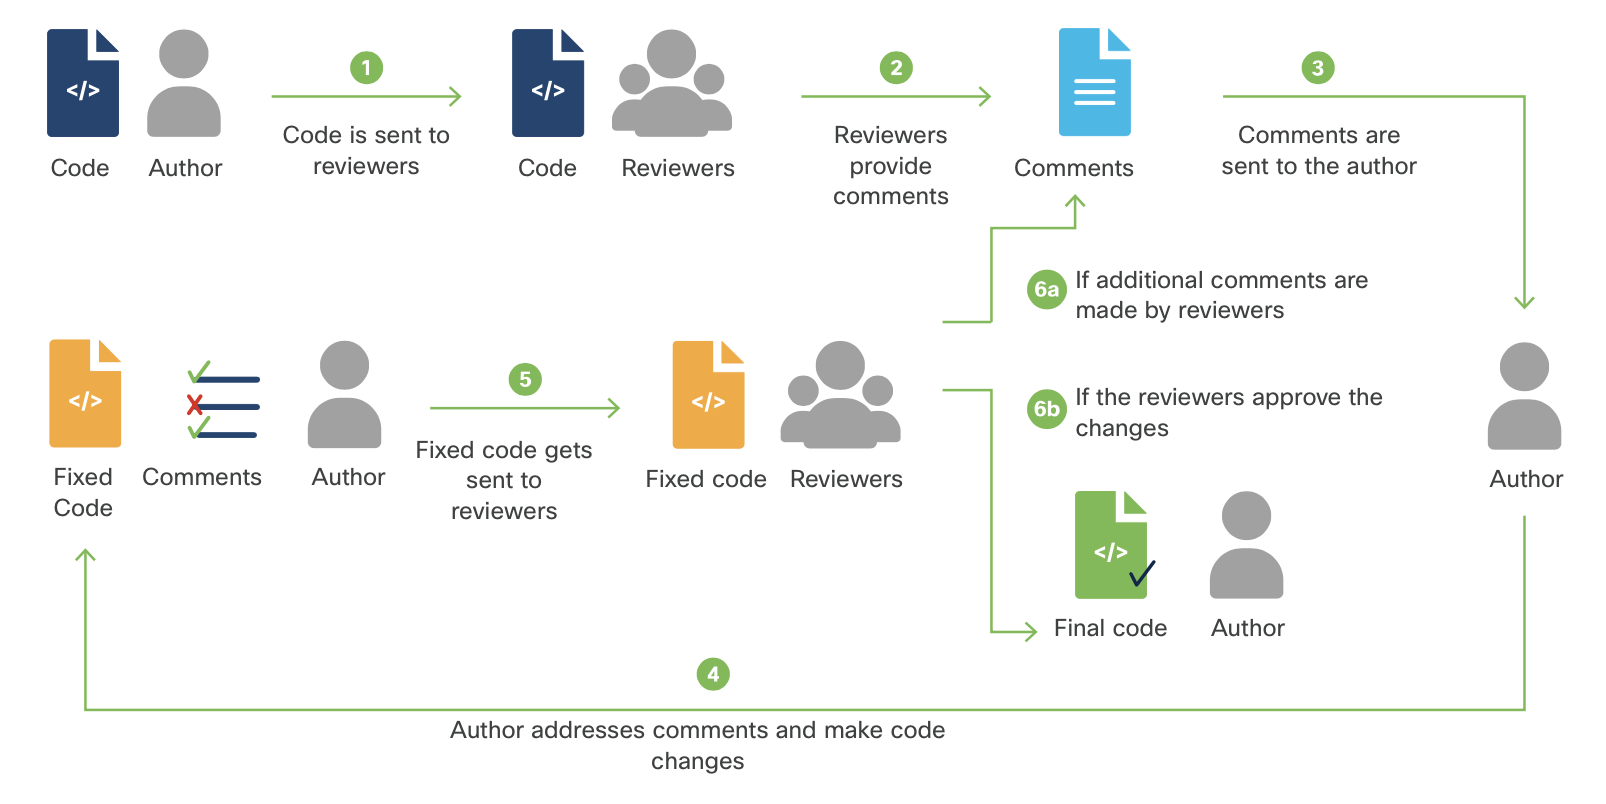

There are many ways to do code reviews. Each one has its own benefits. The most common types of code review processes include:

- Formal code review
- Change-based code review
- Over-the-shoulder code review
- Email pass-around
- Formal Code Review

➡️ **Formal Code Review (Fagan inspection)**

Series of meetings to review the whole codebase (where they go over the code line by line, discussing each one in detail). This type of code reviews process is popular in Waterfall software development methodology and promotes discussion between all of the reviewers (to give better feedback and reach a consensus).

Details of the code review meetings, such as the attendees, the comments, and comments that will be addressed, are documented.

+ Walkthrough - a modern adaptation of the formal code review, single meeting to review only the code changes (live discussion)

➡️ **Change-Based Code Review (tool-assisted)**

Reviews code that was changed as a result of a bug, user story, feature, commit, etc. - initiated by the developers who made the code changes and are responsible for addressing the agreed upon comments. In order to determine the code changes that need to be reviewed, a peer code review tool that highlights the code changes is typically used. Reviewers usually perform the review independently and provide the comments via the peer code review tool.

+ GOOD: easy to determine the actual code changes to be reviewed and enable multiple reviewers to get a diverse look into the code

➡️ **Over-the-Shoulder Code Review**

A reviewer looks over the shoulder of the developer who wrote the code. The developer who wrote the code goes through the code changes line by line and the reviewer provides feedback.

If the fix is not difficult, the code may be changed on the spot so that the reviewer can re-review it immediately. 
+ GOOD: direct interaction between the author of the code and the reviewer, which allows for discussion about what is the right fix
- BAD: it typically involves only one reviewer, so the comments can be one-sided

➡️ **Email Pass-Around**

Automatic emails sent by source code management systems when a checkin is made. When the emails are sent, it is up to the other developers to review the code changes that were made in that checkin. 
- ISSUE: sometimes a single checkin can be just a piece of the whole code change, so it may not include the proper context to fully understand the code changes

----------------------------------------------------------------------------

<h2><b>4. Software Design</b></h2>

<h3>Decomposition to Inheritance</h3>

**Software design patterns** - best practices for common problems in all languages, already been proven to be successful, so using them can speed up development because developers don't need to come up with new solutions and go through a proof of concept to make sure they work

For example, a bus stop and a hospital waiting room, are both places in which people wait; so both can usefully implement features of the pattern A PLACE TO WAIT.

1. Program to an **interface**, NOT an implementation. Tightly coupling mainline program logic with implementations of specific functionality tends to make code hard to understand and maintain. Experience has shown that it works better to loosely-couple logical layers by using abstract interfaces. For instance, the mainline code calls functions and methods in a generic way. Lower-level functions implement matching interfaces for the functionality they provide, ensuring, for example, that all serialization functions used in a program are called in similar fashion.

Object-oriented languages like Java formalize these ideas. They enable explicit declaration of **interfaces** that classes can implement. An interface definition is basically a collection of function prototypes, defining names and types for functions and parameters that higher-level logic might use to invoke a range of classes. For example, the interface to a range of 'vehicle' classes (e.g., class 'car,' 'motorcycle,' 'tractor') might include start_engine(), stop_engine(), accelerate(), and brake() prototypes.

2. Favor object **composition** OVER class inheritance.  
**Inheritance** - more generalized base classes can be inherited by derived classes, e.g.
A 'duck' class might inherit substantial functionality from a 'bird' class. This requires, however, that the bird class implement a very wide range of methods, most of which may not be used by a specific derived class.

**Composition** - favor implementing a specific class (class - duck) by creating only required unique subclasses (class - quack) along with abstract interfaces (interface - 'ducklike') to classes (class - fly, class - swim) that can be shared widely in similar fashion (class - penguin implements interface 'penguinlike,' enabling sharing of class 'swim,' but not 'fly'). Organizing software in this way has proven to be most flexible, ultimately easier to maintain, and encourages reuse of code.

Patterns are usually divided into three main categories:

- **Creational** - used to guide, *simplify*, and abstract software object creation at scale.
- **Structural** - describing reliable ways of using objects and classes *for different* kinds of software projects.
- **Behavioral** - detailing how objects can *communicate* and work together to meet familiar challenges in software engineering.

- <h3><b>SW Patterns: Observer</b></h3>

Behavioral design pattern based on subscription notification that lets objects (observers or subscribers) receive events when there are changes to an object (subject or publisher) they are observing. The benefit of the observer design pattern is that observers can get real time data from the subject when a change occurs. Subscription mechanisms always provide better performance than other options, such as polling.

For example:  
Users (observers) follow other users (subjects).  
When the subject posts something on their social media, it notifies all of the observers that there is a post, and the observers look at that update.

To implement this subscription mechanism:  
- The subject must have the ability to store a list of all of its observers.
- The subject must have methods to add and remove observers.
- All observers must implement a callback to invoke when the publisher sends a notification, preferably using a standard interface to simplify matters for the publisher. This interface needs to declare the notification mechanism, and it needs to have parameters for the publisher to send the necessary data to the observer.

The execution of this design pattern looks like this:

1. An observer adds itself to the subject's list of observers by invoking the subject's method to add an observer.
2. When there is a change to the subject, the subject notifies all of the observers on the list by invoking each observer's callback and passing in the necessary data.
3. The observer's callback is triggered, and therefore executed, to process the notification.
4. Steps 2 and 3 continue whenever there is a change to the subject.
5. When the observer is done receiving notifications, it removes itself from the subject's list of observers by invoking the subject's method to remove an observer.


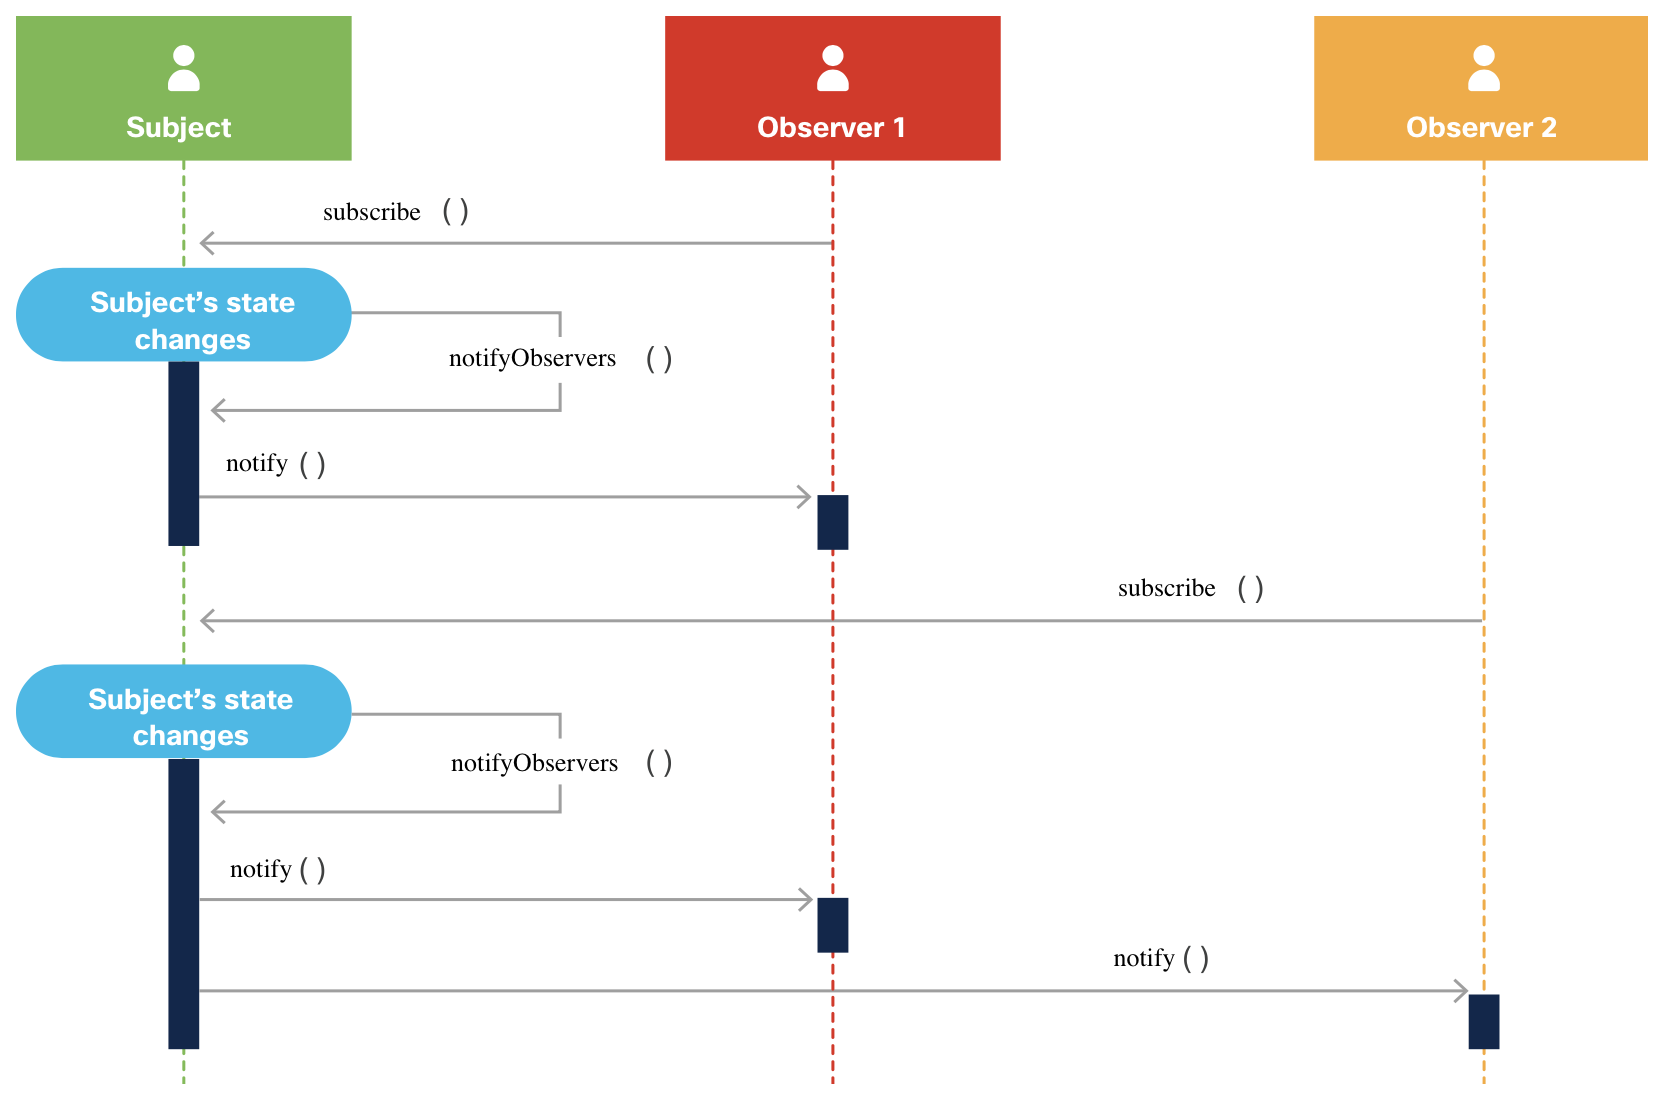

- <h3><b>SW Patterns: MVC</b></h3>

**Model-View-Controller (MVC)** - design/architectural pattern that abstracts code and responsibility into three different components (where each component communicates with each other in one direction): 
- **Model** - The model is the application's data structure and is responsible for managing the data, logic and rules of the application. It gets input from the controller.
- **View** - The view is the visual representation of the data. There can be multiple representations of the same data.
- **Controller** - The controller is like the middleman between the model and view. It takes in user input and manipulates it to fit the format for the model or view.

The execution of the Model-View-Controller looks like this:

1. User: provides input.
2. Controller: accepts the input and manipulates the data, then sends the manipulated data to the model.
3. Model: accepts the manipulated data, processes it, and sends the selected data (in the strictest forms of MVC, via the controller) to the View.
4. View: accepts the selected data and displays it to the user.
5. User: sees the updated data as a result of their input.

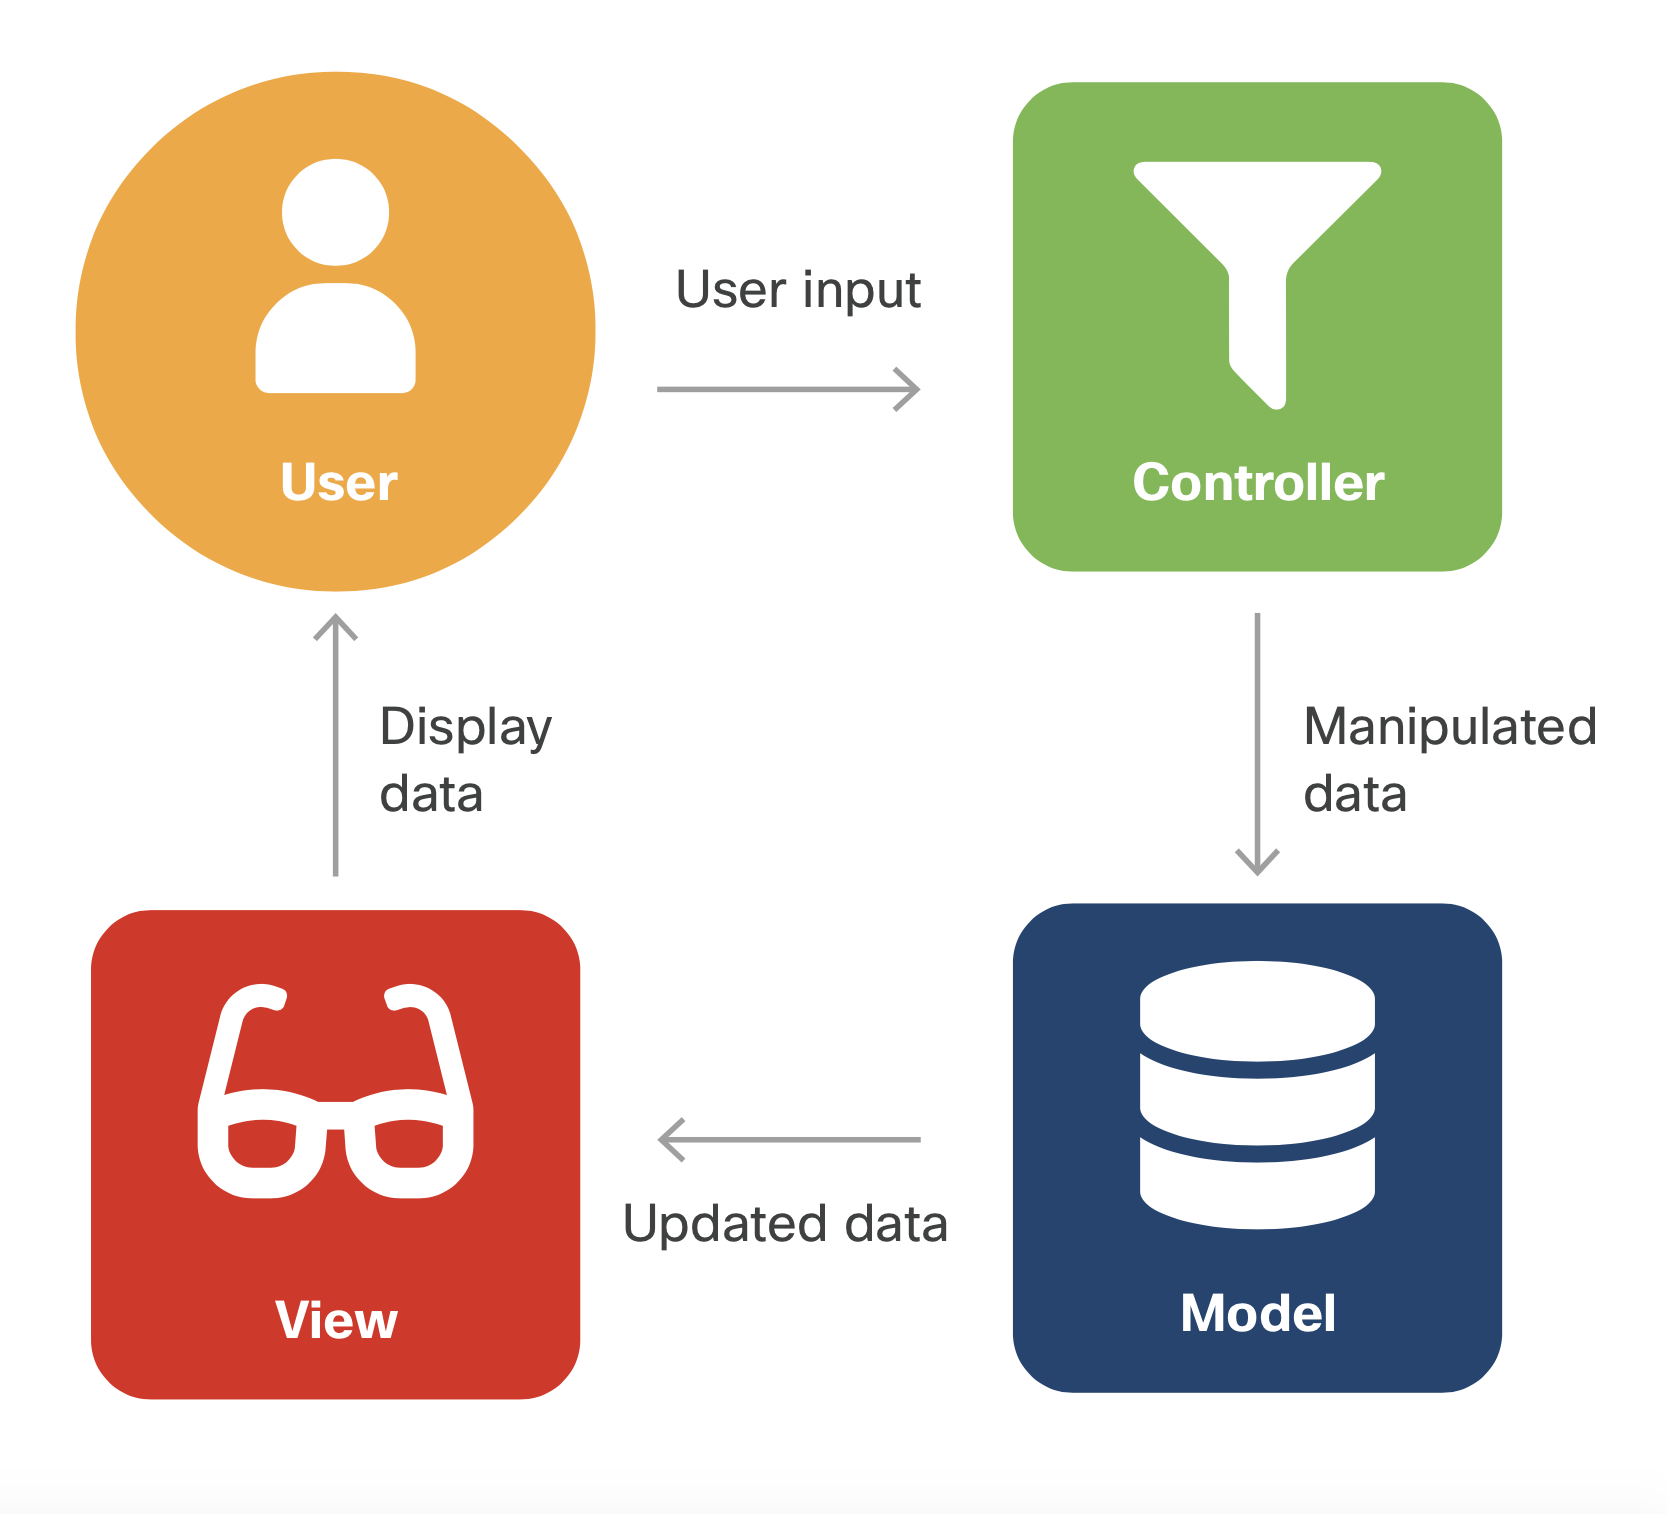

Benefits:
- commonly used in user interfaces (UI) and web application because it simplifies development of applications that depend on GUI (Graphic User Interfaces)
- each component can be built in parallel (is abstracted), the only information each component needs is the input and output interface for the other two components. Components don't need to know about the implementation within the other components. What's more, because each component is only dependent on the input it receives, components can be reused as long as the other components provide the data according to the correct interface.


----------------------------------------------------------------------------

<h2><b>5. Testing</b></h2>

**Software Testing** - make sure it works the way it is supposed to work
- **Functional testing** - examines whether software works correctly. Does it behave as intended in a logical sense:
  - Unit Testing - lowest levels of detail
  - Integration Testing - higher levels of complexity
- **Non-functional testing** - examines usability, performance, security, resiliency, compliance, localization, and many other issues. This type of testing finds out if software is fit for its purpose, provides the intended value, and minimizes risk.

**Test-Driven Development (TDD)** - developers advocate using testing as a framework for guiding software development. This means capturing design requirements as tests and then only writing software to pass those tests

"Agile" software development favors highly-adaptable, minimally-planned creation and extension of a **Minimum Viable Product (MVP)** over short sprints. This means the product exists, in some form, from very early on in the process. And that means it can be subject both to functional and non-functional tests from the start.



<h3><b>Unit Testing</b></h3>

Detailed functional testing of small pieces of code (lines, blocks, functions, classes, and other components in isolation). 
Usually automated via test frameworks that lets you make assertions about testable conditions and determine if these assertions are valid at a point in execution. For example:

In [48]:
assert 2+2 == 4, "Result is wrong!"

The **assert** keyword is actually native to Python.  
In this case, the assertion will return true because 2 + 2 does, in fact, equal 4. On the other hand, if you were to have:

In [51]:
assert 2+2 == 3, "Result is wrong!"

AssertionError: Result is wrong!

It would return false and trigger an error.

**Framework: PyTest**

From pip repositories: pip3 install pytest; can run unittest tests without modification, but it also simplifies testing by letting coders build tests as simple functions rather than class methods.  

PyTest is handy because it automatically executes any scripts that start with test_ or end with _test.py, and within those scripts, automatically executes any functions beginning with 'test_' or 'tests_'. So we can unit test a piece of code (such as a function) by copying it into a file, importing pytest, adding appropriately-named testing functions (names that begin with tests_ ), saving the file under a filename that also begins with 'tests_,' and running it with PyTest.

Suppose we want to test the function add5() , which adds 5 to a passed value, and returns the result.

We can save the function in a file called tests_mytest.py. Then import pytest and write a function to contain our tests, called tests_add5() :

In [53]:
%%writefile first.py
import pytest

def add5(v):
    myval = v + 5
    return myval

def tests_add5():
    r = add5(1)
    assert r == 6
    r = add5(5)
    assert r == 10
    r = add5(10.102645)
    assert r == 15.102645

Overwriting first.py


In [4]:
!pytest first.py

============================= test session starts ==============================
platform linux -- Python 3.9.12, pytest-7.2.0, pluggy-1.0.0
rootdir: /home/yara/Downloads
plugins: anyio-3.6.2
collected 1 item                                                               

first.py .                                                               [100%]

============================== 1 passed in 0.01s ===============================


The tests in our testing function use the standard Python assert keyword. PyTest will compile and report on those results, both when collecting test elements from the file (a preliminary step where PyTest examines Python's own code analysis and reports on proper type use and other issues that emerge prior to runtime), and while running the tests_add5() function.

Note that while the function under test is certainly trivial, many real-world programs contain functions that, like this one, perform math on their arguments. Typically, these functions are called by higher-level functions, which then do additional processing on the returned values.

If there is a mistake in a lower-level function, causing it to return a bad result, this will likely be reflected in higher-level output. But because of all the intermediary processing, it might be difficult or impossible to find the source of an error (or even note whether an error occurred) by looking at output of these higher-level functions, or at program output in general.

That is one reason why detailed unit testing is essential for developing reliable software. And it is a reason why unit tests should be added, each time you add something significant to code at any level, and then re-run with every change you make. We recommend that, when concluding a work session, you write a deliberately-broken unit test as a placeholder, then use a start-of-session unit test run to remind you where you left off.

**Framework: unittest**

Included in Python by default; it lets you create test collections as methods extending a default TestCase class.  

The unittest framework demands a different syntax than PyTest. For unittest , you need to subclass the built-in TestCase class and test by overriding its built-in methods or adding new methods whose names begin with 'test_'. The example unit test script, above, could be modified to work with unittest like this:

In [30]:
import unittest

def add5(v):
    myval = v + 5
    return myval

class tests_add5(unittest.TestCase):
    def test_add5(self):
        self.assertEqual(add5(1),6)
        self.assertEqual(add5(5),10)
        self.assertEqual(add5(10.102645),15.102645)

if __name__ == '__main__':
    unittest.main(argv=['first-arg-is-ignored'], exit=False)

.
----------------------------------------------------------------------
Ran 1 test in 0.001s

OK


As with PyTest, you import the unittest module to start. Your function follows.

To subclass the TestCase class, pass it to your own (derived) test class (again called tests_add5, though this is now a class, rather than a function), causing the latter to inherit all characteristics of the former. For more on Python object-oriented programming (OOP), see the documentation.

Next, use unittest's assertEqual method (this is one of a wide range of built-in test methods) in the same way that you used Python's native assert in the PyTest example. Basically, you are running your function with different arguments, and checking to see if returned values match expectations.

The last stanza is a standard way of enabling command-line execution of our program, by calling its main function; which, in this case, is defined by unittest.

Save this file (again as tests_mytest.py ), ensure that it is executable (for example, in Linux, using chmod +x tests_mytest.py ) and execute it, adding the -v argument to provide a verbose report:

<h3><b>Integration Testing</b></h3>

Makes sure that all of individual units you have been building fit together properly to make a complete application.  
e.g. application that you are writing needs to consult a local web service to obtain configuration data, including the name of a relevant database host.  

You might want to test the values of variables set when these functions are called. If you were using PyTest, you could do that like this:

In [2]:
%%writefile second.py
import pytest
import requests   # python module that simplifies making web requests

def get_config():
    print(requests.get("http://localhost/get_config").content)
    return requests.get("http://localhost/get_config").content

def set_config(dbhost):
    requests.get("http://localhost/config_action?dbhost="+dbhost)
    
save_dbhost = ""

def setUp():
    global save_dbhost
    save_dbhost = get_config()
    
def tearDown():
    global save_dbhost
    set_config(save_dbhost)

def test_setconfig():
    setUp()
    set_config("TESTVAL")
    assert get_config() == "ESTVAL"
    tearDown()


Overwriting second.py


In [3]:
!pytest second.py

============================= test session starts ==============================
platform linux -- Python 3.9.12, pytest-7.2.0, pluggy-1.0.0
rootdir: /home/yara/Downloads
plugins: anyio-3.6.2
collected 1 item                                                               

second.py F                                                              [100%]

=================================== FAILURES ===================================
________________________________ test_setconfig ________________________________

    def test_setconfig():
        setUp()
        set_config("TESTVAL")
>       assert get_config() == "ESTVAL"
E       assert b'<!DOCTYPE HTML PUBLIC "-//IETF//DTD HTML 2.0//EN">\n<html><head>\n<title>404 Not Found</title>\n</head><body>\n<h1>N...und on this server.</p>\n<hr>\n<address>Apache/2.4.52 (Ubuntu) Server at localhost Port 80</address>\n</body></html>\n' == 'ESTVAL'
E        +  where b'<!DOCTYPE HTML PUBLIC "-//IETF//DTD HTML 2.0//EN">\n<html><head>\n<title>404 Not Fo

Note that your test_setconfig() method deliberately calls your setUp() function before running tests, and your tearDown() function afterward. In unittest, methods called setUp() and tearDown() are provided by the TestCase class, can be overridden in your defined subclass, and are executed automatically.

Again, you should run your integration tests before you make any changes for the day, whenever you make significant changes, and before you close out for the day. If you are using Continuous Integration, any errors you find must be corrected before you do anything else.

----------------------------------------------------------------------------

<h2><b>6. TDD Concept</b></h2>

**Test-Driven Development** (sometimes called Test-First Development) - write testing code before you write application code, having expressed requirements in your testing code, you can then write application code until it passes the tests you have created in the testing code.

Building small, simple unit and integration tests around small bits of code helps in two ways:

- validate system design (if units are following requirements within the context of your evolving solution)
- bugs are isolated locally and fixed with refactored code, before actual testing or using parts of the solution that depend on these components

The basic pattern of TDD is a five-step, repeating process:

1. Create a **new test** (adding it to existing tests, if they already exist). The idea here is to capture some requirement of the unit of application code you want to produce.
2. **Run tests** to see if any fail for unexpected reasons. If this happens, correct the tests. Note that expected failures, here, are acceptable (for example, if your new test fails because the function it is designed to test does not yet exist, that is an acceptable failure at this point).
3. **Write application code** to pass the new test. The rule here is to add nothing more to the application besides what is required to pass the test.
4. **Run tests** to see if any fail. If they do, correct the application code and try again.
5. **Refactor and improve application code**. Each time you do, re-run the tests and correct application code if you encounter any failures.

This mandates creation of a highly-testable code (that breaks operations down into pure functions that can be tested in isolation, in any order, etc.) By proceeding this way, the test harness leads and grows in lockstep with your application.


----------------------------------------------------------------------------

<h2><b>Checklist:</b></h2>

I know:
- basic Python components, e.g. functions, methods, classes, objects, modules
- difference between function and method
- how to turn reusable code into functions
- clean code basics and benefits
- 3 types of Software Design Patterns
- how MVC and Observer patterns work
- steps of Code Review process and its benefits
- concept of TDD
- what's the difference between Unit Testing and Integration Testing
- how to write Unit Test and Integration Test

----------------------------------------------------------------------------

<h2><b>HOMEWORK:</b></h2>

1. This code is ugly! Fix it using function (and return final result):

In [21]:
# CODE
result1 = 0+1
print(result1)
result2 = 1+2
print(result2)
result3 = 2+3
print(result3)
result4 = 3+4
print(result4)
result5 = 4+5
print(result5)
final = result1 + result2 + result3 + result4 + result5
print(final)

1
3
5
7
9
25


In [17]:
# YOUR SOLUTION
def result_fun(a:int, b:int): 
    result = a+b             #add input 'a' and 'b'
    return result            #return the result
    
final = 0;
for i in range (0,5):        #loop to get successive numbers 'a' and 'b'
    final = final + result_fun(i,i+1) #accumulate results from 'result_function()'
    print(result_fun(i,i+1))          #print the output
print(final)


1
3
5
7
9
25


2. These functions doesn't work as expected. Fix them:

In [32]:
def test_function(a,b):
    """ Why result1 is None? :("""
    """because there's no return statement to return result"""
    result = a*b
    print('Result: {0}'.format(result))
    return result

result1 = test_function(2,4)
print(result1)

#######################################

def test_function2(a,b):
    """ Why do we have only 15 instead of Result: 15 as well? :("""
    """because print('Result: {0}'.format(result)) statement was after the return statement
    that mark the end of a function """
    result = a*b
    print('Result: {0}'.format(result))
    return result
    
result2 = test_function2(3,5)

Result: 8
8
Result: 15


3. Write a class definition of a Pizza, create 3 pizzas:
- 50cm, Quattro Formaggi with olive oil
- 32cm, Prosciutto with garlic sauce
- 40cm, Margheritta with tomato sauce

In [31]:
class Pizza():
    def __init__(self, size:int, name:str, flavor:str):      #class constructor
        self.name = name
        self.size = size
        self.flavor = flavor

pizza1 = Pizza(50, "Quattro Formaggi", "olive oil")           #create Pizza object 'pizza 1'
print(f"{pizza1.size}cm, {pizza1.name} with {pizza1.flavor}") #give 'pizza 1' properties from class 'Pizza'

pizza2 = Pizza(32, "Prosciutto", "garlic sauce")
print(f"{pizza2.size}cm, {pizza2.name} with {pizza2.flavor}")

pizza3 = Pizza(40, "Margheritta", "tomato sauce")
print(f"{pizza3.size}cm, {pizza3.name} with {pizza3.flavor}")

50cm, Quattro Formaggi with olive oil
32cm, Prosciutto with garlic sauce
40cm, Margheritta with tomato sauce


4. Unit Testing:  
Write function that once inputted a birth year - will validate whether the person is above 80 years old and by that - classified to get a COVID vaccine! Raise AssertionError if not.

In [29]:
%%writefile test_unit.py
import pytest
from datetime import date

#function returning person's age
def above_80(birth_year):
    age = date.today().year - int(birth_year)
    return age

#testing if people from different ages need COVID vaccine or not
def test_above_80():
    age = above_80(1924)
    assert age>=80 , "Must get COVID vaccine"
    age = above_80(1944)
    assert age>=80 , "Must get COVID vaccine"
    age = above_80(1996)
    assert age>=80 , "Must get COVID vaccine"

Overwriting test_unit.py


In [30]:
!pytest test_unit.py

============================= test session starts ==============================
platform linux -- Python 3.9.12, pytest-7.2.0, pluggy-1.0.0
rootdir: /home/yara/Downloads
plugins: anyio-3.6.2
collected 1 item                                                               

test_unit.py F                                                           [100%]

=================================== FAILURES ===================================
________________________________ test_above_80 _________________________________

    def test_above_80():
        age = above_80(1924)
        assert age>=80 , "Must get COVID vaccine"
        age = above_80(1944)
>       assert age>=80 , "Must get COVID vaccine"
E       AssertionError: Must get COVID vaccine
E       assert 78 >= 80

test_unit.py:14: AssertionError
=========================== short test summary info ============================
FAILED test_unit.py::test_above_80 - AssertionError: Must get COVID vaccine
============================== 1 failed

*** 5. Write Integration Test of your choice (OPTIONAL):

In [26]:
%%writefile test_integration.py
import requests

#function returning http response
def get_response(): 
    response = requests.get("http://api.zippopotam.us/us/90210")
    return response

#function returning http response body
def get_response_body(response):
    response_body = response.json()
    return response_body

#test the functions together
def test_get_locations_for_US():
    response_US = get_response() 
    response_body_US = get_response_body(response_US)
    assert response_body_US["country"] == "United States" #checking the value of the response body element "country" if it's compatible to the United States

Overwriting test_integration.py


In [27]:
!pytest test_integration.py

============================= test session starts ==============================
platform linux -- Python 3.9.12, pytest-7.2.0, pluggy-1.0.0
rootdir: /home/yara/Downloads
plugins: anyio-3.6.2
collected 1 item                                                               

test_integration.py .                                                    [100%]

============================== 1 passed in 0.57s ===============================
